# Machine Learning Coursework 

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 9     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 12    |  
| Results (KNN folds + Summary + Confusion matrices) | 9     |  
| Final questions:                                   | 9     |  
| Overall quality & use of Markdown                  | 6     |  
| Total available                                    |**45** |  


## 1. Exploratory Data Analysis [9 pts]

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

# load data
wine=datasets.load_wine()
#print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target

### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

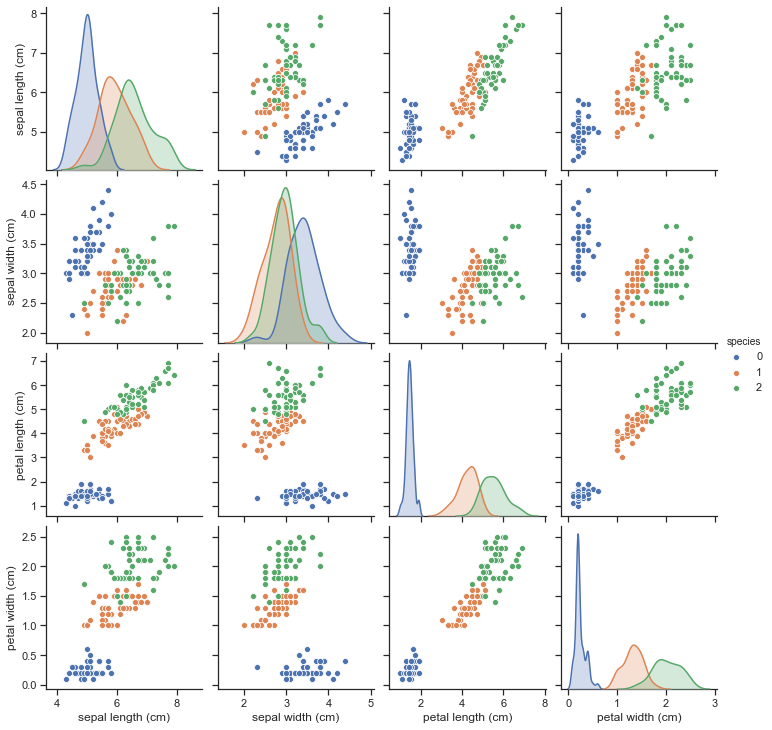

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


In [2]:
# define plotting function
def plotGrid(X,y):

    fig = plt.figure(figsize=(10,10))

    ax = fig.add_subplot(4,4,1) 
    plt.hist(X[:, 0])
    plt.ylabel('alcohol')

    ax = fig.add_subplot(4,4,2) 
    ax.scatter(X[:, 1], X[:, 0], c=y)
    
    ax = fig.add_subplot(4,4,3) 
    ax.scatter(X[:, 2], X[:, 0], c=y)
    
    ax = fig.add_subplot(4,4,4) 
    ax.scatter(X[:, 3], X[:, 0], c=y)
    
    ax = fig.add_subplot(4,4,5) 
    ax.scatter(X[:, 0], X[:, 1], c=y)
    ax.set_ylabel('flavanoids')   
    
    ax = fig.add_subplot(4,4,6) 
    ax.hist(X[:, 1])
   
    ax = fig.add_subplot(4,4,7) 
    ax.scatter(X[:, 2], X[:, 1], c=y)
   
    ax = fig.add_subplot(4,4,8) 
    ax.scatter(X[:, 3], X[:, 1], c=y)
   
    ax = fig.add_subplot(4,4,9) 
    ax.scatter(X[:, 0], X[:, 2], c=y)
    ax.set_ylabel('color intensity')    
    
    ax = fig.add_subplot(4,4,10) 
    ax.scatter(X[:, 1], X[:, 2], c=y)
    
    ax = fig.add_subplot(4,4,11) 
    ax.hist(X[:, 2])
   
    ax = fig.add_subplot(4,4,12) 
    ax.scatter(X[:, 3], X[:, 2], c=y)
   
    ax = fig.add_subplot(4,4,13) 
    ax.scatter(X[:, 0], X[:, 3], c=y)
    ax.set_ylabel('ash')  
    ax.set_xlabel('alcohol')   
    
    ax = fig.add_subplot(4,4,14) 
    ax.scatter(X[:, 1], X[:, 3], c=y)
    ax.set_xlabel('flavanoids')   
    
    ax = fig.add_subplot(4,4,15) 
    ax.scatter(X[:, 2], X[:, 3], c=y)
    ax.set_xlabel('color intensity')   
    
    ax = fig.add_subplot(4,4,16) 
    ax.hist(X[:, 3])
    ax.set_xlabel('ash')   
    
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='center right')
    

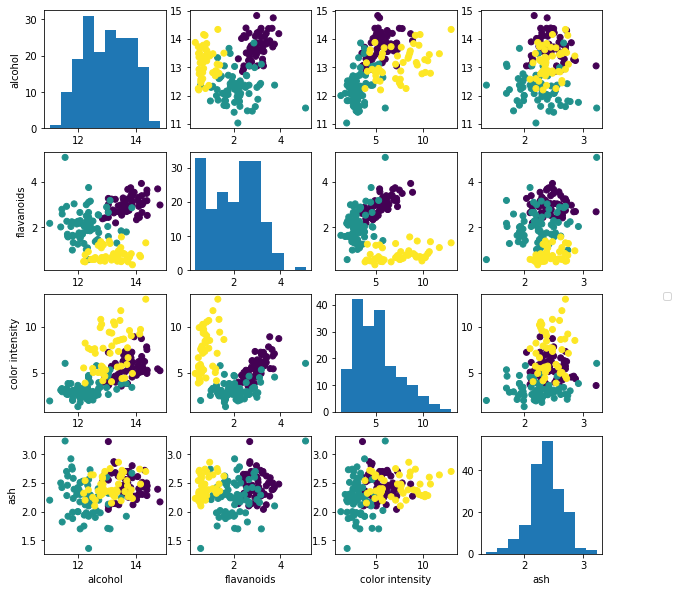

In [3]:
plotGrid(X,y)

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)

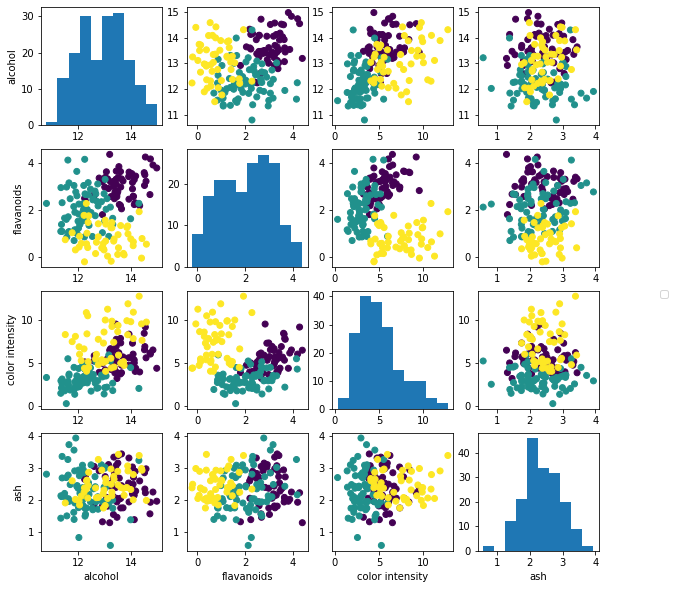

In [4]:
# initialize random seed to replicate results over different runs
seed = 12345 
np.random.seed(seed) 
XN = X + np.random.normal(0, 0.5, X.shape)

plotGrid(XN,y)


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 



#### Answer

The scatter plots above demonstrate that for most of the feature comparisons, the classes are fairly clustered together. Because knn will be used, which depends on distance between class items for accurate classification, the less distance between class items the less accurately we might expect the algorithm to classify items.

In the case of color intensity and flavanoids, more separation between classes can be seen. Therefore these would be the best features to select if the analysis was restricted to just 2.


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


#### Answer

Taking color intensity and flavanoids, the scatter plots with noise show more diffusion in the location of class items. In other words, the average distance between class items appears to be reduced. 

The expectation would then be that the classifier's accuracy would be slightly diminished. Interestingly, this was not born out in my results below. This may be because across most of the features, as noted above, the classes were fairly clustered to begin with. This coud also be the result of how accuracy per fold was evaluated, as noted below.

## 2. Implementing kNN [6 pts]

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


In [5]:
# helper code

def test_train_split(X, y, test_size):
    '''Splits dataset into training and testing subsets'''

    test_size = round(len(X) * test_size)
    index = np.arange(0, len(X))
    testix = np.random.choice(len(index), test_size, replace=False)
    trainix = [x for x in index if x not in testix]
    
    X_test, X_train = X[testix], X[trainix]
    y_test, y_train = y[testix], y[trainix]
    
    return X_train, X_test, y_train, y_test    
    
def dist(vec1, vec2, metric):
    '''Calculates the Euclidean or Manhattan distance between vec1 and vec2'''
    
    if metric == 'euclidean':
        dist = np.linalg.norm(vec1 - vec2)
    if metric == 'manhattan':
        dist = sum(abs(val1-val2) for val1, val2 in zip(vec1,vec2))
    return dist

def mode(List):
    '''Calculates the mode of a list'''
    return max(set(list(List)), key = list(List).count)

def nearest_neighbors(vec, X_train, k, metric):
    '''Calculates the index position of the nearest neighbor(s) to the given vector'''
    
    assert k > 0, 'k must be a whole number'
    assert k - int(k) == 0, 'k must be a whole number'
    assert k < len(X_train) + 1, 'k cannot exceed the size of the training data'
    
    # build a dict recording the distance between
    # the given vector and all others in the dataset
    dist_dict = {}
    for i in range(len(X_train)):
        if np.array_equal(vec, X_train[i]) != True:    # exclude vector's distance to itself
            dist_dict[i] = dist(vec, X_train[i], metric)
      
        # sort the dict by distances
        dict_sorted = dict(sorted(dist_dict.items(), key=lambda item: item[1]))
        
        # create list of the sorted indices comprising only the first k items
        nearest = list(dict_sorted)[:k]

    return nearest

In [6]:
def knn(X_train, X_test, y_train, y_test, k, metric):
    '''Predicts labels for X_test values based on nearest neighbor(s)'''
    
    y_pred = np.zeros(y_test.shape, dtype=int) 

    for i in range(len(X_test)):
        index = nearest_neighbors(X_test[i], X_train, k, metric)
        label = y_train[index]

        # find the most frequent label among the nearest neighbors
        if k > 1:
            label = mode(label)

        y_pred[i] = label 
        
    return y_pred

## 3. Classifier evaluation [3 pts]

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


In [7]:
def confmat(y_test, y_pred):
    '''Generates a confusion matrix of y_pred against y_test'''
    
    confmat = np.zeros((3,3), dtype=int)
    
    for val,pred in zip(y_test, y_pred):
        confmat[val,pred] += 1
   
    return confmat

def accuracy(y_test, y_pred):
    '''Calculates the accuracy of y_pred values against y_test'''
    correct = 0
    
    for i in range(len(y_test)):
        correct += np.where(y_test[i]==y_pred[i], 1, 0)

    return correct/len(y_test)

In [8]:
# generate some example results to test against
X_train, X_test, y_train, y_test = test_train_split(X, y, 0.2)   
y_pred = knn(X_train, X_test, y_train, y_test, 5, 'euclidean')

print(accuracy(y_test,y_pred))

#note: len(np.unique(y)) indicates the dimensions of the confusion matrix (why?)
print(confmat(y_test,y_pred))

0.9444444444444444
[[10  0  0]
 [ 2  9  0]
 [ 0  0 15]]


In [9]:
# test evaluation code

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9444444444444444
[[10  0  0]
 [ 2  9  0]
 [ 0  0 15]]



## 4. Nested Cross-validation using your implementation of KNN  [6 pts]

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [12]:
def nestedCrossVal(X, y, folds, k_vals, metrics, indices, seed):
    '''Return the best performing hyperparameters per fold with the given k-values and distance metric'''
    
    index = np.arange(0,len(X))

    # create arrays to store values to be returned by function
    fold_scores = np.empty(shape=(0, 3))
    conf_matrices = np.empty(shape=(0, 3), dtype=int)
    
    # folds
    for fold in range(folds):
        print('Processing fold {} of {}...'.format(fold+1, folds))
        
        # test / train split in the fold
        testix = indices[fold]
        trainix = [x for x in index if x not in testix]
        X_test, X_train = X[testix], X[trainix]
        y_test, y_train = y[testix], y[trainix]

        # train / validation split to be used in the loops
        val_size = 0.25
        val_size = round(len(X) * val_size)
        loop_index = np.arange(0, len(trainix))
        loop_valix = np.random.choice(len(trainix), val_size, replace=False)
        loop_trainix = [x for x in trainix if x not in loop_valix]
        X_val, X_train = X[loop_valix], X[loop_trainix]
        y_val, y_train = y[loop_valix], y[loop_trainix]
        
        # calculate number of parameter permutations, i.e. how many inner loops will be run
        loops = len(k_vals) * len(metrics)
        
        # create an array to store the coming accuracy scores of the loop hyperparameters
        loop_scores = np.empty(shape=(0, 3))

        # inner loops
        for k_val in k_vals:
            for metric in metrics:
                
                # calculate knn's predicted values and determine the accuracy 
                y_pred = knn(X_train, X_val, y_train, y_val, k_val, metric)
                score = accuracy(y_val,y_pred)
                print('accuracy = {} for k = {} and distance = {}'.format(score, k_val, metric))
                
                # add the k-val, metric and accuracy score to scores array          
                new_row = np.array([[k_val,metric,score]])
                loop_scores = np.concatenate((loop_scores, new_row), axis=0)

        # evaluate the winning hyperparameters
        high_score = max(loop_scores[:, 2])
        winner = np.argwhere(loop_scores==high_score)[0]
        winner = loop_scores[winner[0]]
        k_winner = winner[0]
        m_winner = winner[1]
        
        # record the fold's winning values
        new_row = np.array([[k_winner,m_winner,high_score]])
        fold_scores = np.concatenate((fold_scores, new_row), axis=0)
        print("With a score of {}, this fold's winners are k={} and distance={}".format(high_score, k_winner, m_winner))
        
        # generate a set of y_pred from the winning parameters again, so its confusion matrix can be shown
        y_pred = knn(X_train, X_test, y_train, y_test, k_val, metric)
        
        print("Confusion matrix:\n", confmat(y_test,y_pred), "\n")
        
        new_row = np.array(confmat(y_test,y_pred))
        conf_matrices = np.concatenate((conf_matrices, new_row), axis=0)
                
    # evaluate the winning parameters    
    fold_scores = fold_scores[:, 2].astype(float)

    return fold_scores, conf_matrices

In [15]:
# evaluate clean data

# generate the fold indices
folds = 5
np.random.seed(seed)
indices = np.random.permutation(np.arange(0,len(X),1))
indices = np.array_split(indices, folds) 

folds_clean, conf_matrices_clean = nestedCrossVal(X,y,folds,list(range(1,11)), ['euclidean','manhattan'], indices, seed)

Processing fold 1 of 5...
accuracy = 0.8863636363636364 for k = 1 and distance = euclidean
accuracy = 0.8636363636363636 for k = 1 and distance = manhattan
accuracy = 0.8863636363636364 for k = 2 and distance = euclidean
accuracy = 0.8636363636363636 for k = 2 and distance = manhattan
accuracy = 0.8636363636363636 for k = 3 and distance = euclidean
accuracy = 0.8863636363636364 for k = 3 and distance = manhattan
accuracy = 0.8636363636363636 for k = 4 and distance = euclidean
accuracy = 0.8636363636363636 for k = 4 and distance = manhattan
accuracy = 0.8636363636363636 for k = 5 and distance = euclidean
accuracy = 0.8636363636363636 for k = 5 and distance = manhattan
accuracy = 0.8409090909090909 for k = 6 and distance = euclidean
accuracy = 0.8636363636363636 for k = 6 and distance = manhattan
accuracy = 0.8636363636363636 for k = 7 and distance = euclidean
accuracy = 0.8636363636363636 for k = 7 and distance = manhattan
accuracy = 0.8409090909090909 for k = 8 and distance = euclidean

In [16]:
# evaluate noisy data

# generate the fold indices
folds = 5
np.random.seed(seed)
indices = np.random.permutation(np.arange(0,len(X),1))
indices = np.array_split(indices, folds) 

folds_noisy, conf_matrices_noisy = nestedCrossVal(XN,y,folds,list(range(1,11)), ['euclidean', 'manhattan'], indices, seed)

Processing fold 1 of 5...
accuracy = 0.8181818181818182 for k = 1 and distance = euclidean
accuracy = 0.8409090909090909 for k = 1 and distance = manhattan
accuracy = 0.8181818181818182 for k = 2 and distance = euclidean
accuracy = 0.8409090909090909 for k = 2 and distance = manhattan
accuracy = 0.8863636363636364 for k = 3 and distance = euclidean
accuracy = 0.9318181818181818 for k = 3 and distance = manhattan
accuracy = 0.8409090909090909 for k = 4 and distance = euclidean
accuracy = 0.8409090909090909 for k = 4 and distance = manhattan
accuracy = 0.9090909090909091 for k = 5 and distance = euclidean
accuracy = 0.9545454545454546 for k = 5 and distance = manhattan
accuracy = 0.8636363636363636 for k = 6 and distance = euclidean
accuracy = 0.9090909090909091 for k = 6 and distance = manhattan
accuracy = 0.9545454545454546 for k = 7 and distance = euclidean
accuracy = 0.9090909090909091 for k = 7 and distance = manhattan
accuracy = 0.9318181818181818 for k = 8 and distance = euclidean

In [17]:
# cheat code for below

# clean
print('Clean \n' + 'Mean:', np.mean(folds_clean))
print('Standard deviation:', round(np.std(folds_clean), 5))

# noisy
print('\n' + 'Noisy \n' + 'Mean:', np.mean(folds_noisy))
print('Standard deviation:', round(np.std(folds_noisy), 5))

Clean 
Mean: 0.9363636363636363
Standard deviation: 0.03636

Noisy 
Mean: 0.9409090909090908
Standard deviation: 0.02318


## 5. 

Summary of results [6 pts]

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.8864  |  1 | euclidean  |
| 2 | 0.9773  |  3 | euclidean  |
| 3 | 0.9773  |  2 | euclidean  |
| 4 | 0.9318  |  1 | euclidean  |
| 5 | 0.9091  |  1 | manhattan  |
| **total** | 0.9364 $\pm$ 0.0364 |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.9545  |  5 | manhattan  |
| 2 | 0.9318  |  2 | euclidean  |
| 3 | 0.9091  |  10 | euclidean  |
| 4 | 0.9773  |  7 | euclidean  |
| 5 | 0.9318  |  4 | manhattan  |
| **total** | 0.9409 $\pm$ 0.0232 |   |    |

### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


In [18]:
# clean data summary results

confmat1 = conf_matrices_clean[0:3]; confmat2 = conf_matrices_clean[3:6];
confmat3 = conf_matrices_clean[6:9]; confmat4 = conf_matrices_clean[9:12]
confmat5 = conf_matrices_clean[12:15]
confmat_total = confmat1 + confmat2 + confmat3 + confmat4 + confmat5

clean = pd.DataFrame(confmat_total)
clean.index = pd.Index(clean.index, name='true')
clean.columns = pd.Index(clean.columns, name='predicted')

print('Clean Data Total Confusion Matrix\n')
print(clean)

# noisy data summary results

confmat1 = conf_matrices_noisy[0:3]; confmat2 = conf_matrices_noisy[3:6]
confmat3 = conf_matrices_noisy[6:9]; confmat4 = conf_matrices_noisy[9:12]
confmat5 = conf_matrices_noisy[12:15]
confmat_total = confmat1 + confmat2 + confmat3 + confmat4 + confmat5

noisy = pd.DataFrame(confmat_total)
noisy.index = pd.Index(clean.index, name='true')
noisy.columns = pd.Index(clean.columns, name='predicted')

print('\n\nNoisy Data Total Confusion Matrix\n')
print(noisy)

Clean Data Total Confusion Matrix

predicted   0   1   2
true                 
0          59   0   0
1          10  59   2
2           0   0  48


Noisy Data Total Confusion Matrix

predicted   0   1   2
true                 
0          53   5   1
1           3  67   1
2           0   1  47


## 6. More questions [9 pts]

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


#### Answer
Looking at the above summary tables, it doesn't appear the optimal parameters were strongly related across the clean and noisy groups. 

For the clean data, the two parameter combinations yielding the highest accuracy of 0.9773 were k = 1 or 2 and distance = euclidean. We can also see the k values tended to be low while the distance metrics tended to be euclidean across folds.

For the noisy data, the parameter combination with the highest accuracy of 0.9773 was k = 5 and distance = manhattan. Clearly, quite different results. Optimal k values and distance metrics were fairly evenly distributed across folds, with no clear pattern between folds as there was in the clean data.

Therefore, it appears the optimal parameters *did* vary by the input data. This is a somewhat intuitive finding. If the optical parameters didn't vary by the dataset, then they wouldn't need to be optimized for each dataset. 

Having said that, my algorithm could have been better. The optimal parameters per fold were chosen as simply the first instance of the highest accuracy. Since low values of k were run first and euclidean was tested before manhattan, these parameters were slightly favored in the above results. 

### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

#### Answer
This is a very good question and not an eventuality that I considered in my knn algorithm above! 

I think the most immediately obvious solution would be to take whichever neighbor is closer and favor its class. While you could write code to compare the distances between the neighbors and return the label of the closet one, this is just the equivalent of running with a k-value that is 1 lower than previously. This is the simplest way to handle this without the need to write as much new code. 

In that case, I would simply write code to check for this condition and then return this message to the user.

In [ ]:
if the labels of the [even number] nearest neighbors is not the same:
    
    Stop the program and return an error message to the user stating what happened and recommending lowering the k-value by 1

### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


#### Answer
Much of Data Science is spent simply cleaning the data so it's possible to analyze it. The dataset in this project and those mentioned above are handed to us on a silver platter! While this is not the job of the knn algorithm - separate functions would be written and used for cleaning purposes - it is worth mentioning that that was outside the scope of this project, but is very much within the scope of data science.

Coming back to the knn() and nestedCrossVal() functions, this project was run on only 4 features of the wine dataset, which itself only has 178 observations. That is a fairly small dataset in the world of Data Science. The breast cancer dataset, for example, has 569 observations and dozens of features for each! The algorithm efficiency would have to be considered here. Ideally, the knn() nestedCrossVal() functions would be optimized to run as fast as possible.

Below I ran the knn() and nestedCrossVal() functions on the iris and breast cancer datasets to see if they would complete successfully, and they did. Not having optimized the functions, however, I limited the breast cancer data to the first 200 observations. For what it's worth, the iris data set showed a 3% average accuracy improvement over the clean wine set, whereas the breast cancer set showed a 1% average accuracy improvement. Interestingly, one fold in the iris set acheived an accuracy of 1.0! 

In [29]:
# Test code on the iris dataset

iris=datasets.load_iris()

# this dataset has 13 features, we will only choose a subset of these
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names )

# extract the data as numpy arrays of features X and target y
X = df_iris.values
y = iris.target

X_train, X_test, y_train, y_test = test_train_split(X, y, 0.3)   
y_pred = knn(X_train, X_test, y_train, y_test, 5, 'euclidean')

# generate the fold indices
folds = 5
np.random.seed(seed)
indices = np.random.permutation(np.arange(0,len(X),1))
indices = np.array_split(indices, folds) 

folds_iris, conf_matrices_iris = nestedCrossVal(X,y,folds,list(range(1,11)), ['euclidean','manhattan'], indices, seed)

# show average accuracy
print('Mean:', np.mean(folds_iris))
print('Standard deviation:', round(np.std(folds_iris), 5))

Processing fold 1 of 5...
accuracy = 0.9736842105263158 for k = 1 and distance = euclidean
accuracy = 0.9473684210526315 for k = 1 and distance = manhattan
accuracy = 0.9736842105263158 for k = 2 and distance = euclidean
accuracy = 0.9736842105263158 for k = 2 and distance = manhattan
accuracy = 0.9473684210526315 for k = 3 and distance = euclidean
accuracy = 0.9736842105263158 for k = 3 and distance = manhattan
accuracy = 0.9473684210526315 for k = 4 and distance = euclidean
accuracy = 0.9736842105263158 for k = 4 and distance = manhattan
accuracy = 0.9210526315789473 for k = 5 and distance = euclidean
accuracy = 0.9473684210526315 for k = 5 and distance = manhattan
accuracy = 0.9473684210526315 for k = 6 and distance = euclidean
accuracy = 0.9473684210526315 for k = 6 and distance = manhattan
accuracy = 0.9473684210526315 for k = 7 and distance = euclidean
accuracy = 0.9473684210526315 for k = 7 and distance = manhattan
accuracy = 0.9736842105263158 for k = 8 and distance = euclidean

In [30]:
# Test code on the breast cancer dataset

bc=datasets.load_breast_cancer()

# this dataset has 13 features, we will only choose a subset of these
df_bc = pd.DataFrame(bc.data, columns = bc.feature_names )

# extract the data as numpy arrays of features, X, and target, y
X = df_bc.values
X = X[:200]
y = bc.target
y = y[:200]

X_train, X_test, y_train, y_test = test_train_split(X, y, 0.3)   
y_pred = knn(X_train, X_test, y_train, y_test, 5, 'euclidean')

# generate the fold indices
folds = 5
np.random.seed(seed)
indices = np.random.permutation(np.arange(0,len(X),1))
indices = np.array_split(indices, folds) 

folds_bc, conf_matrices_bc = nestedCrossVal(X,y,folds,list(range(1,11)), ['euclidean','manhattan'], indices, seed)

# show average accuracy
print('Mean:', np.mean(folds_bc))
print('Standard deviation:', round(np.std(folds_bc), 5))

Processing fold 1 of 5...
accuracy = 0.94 for k = 1 and distance = euclidean
accuracy = 0.94 for k = 1 and distance = manhattan
accuracy = 0.86 for k = 2 and distance = euclidean
accuracy = 0.88 for k = 2 and distance = manhattan
accuracy = 0.88 for k = 3 and distance = euclidean
accuracy = 0.9 for k = 3 and distance = manhattan
accuracy = 0.86 for k = 4 and distance = euclidean
accuracy = 0.86 for k = 4 and distance = manhattan
accuracy = 0.88 for k = 5 and distance = euclidean
accuracy = 0.9 for k = 5 and distance = manhattan
accuracy = 0.88 for k = 6 and distance = euclidean
accuracy = 0.9 for k = 6 and distance = manhattan
accuracy = 0.9 for k = 7 and distance = euclidean
accuracy = 0.9 for k = 7 and distance = manhattan
accuracy = 0.86 for k = 8 and distance = euclidean
accuracy = 0.86 for k = 8 and distance = manhattan
accuracy = 0.84 for k = 9 and distance = euclidean
accuracy = 0.9 for k = 9 and distance = manhattan
accuracy = 0.84 for k = 10 and distance = euclidean
accuracy =